## **Ridge Composite Quantile Regression**

[![Slides](https://img.shields.io/badge/🦌-ReHLine-blueviolet)](https://rehline-python.readthedocs.io/en/latest/)

The regularized composite quantile regression solves the following optimization problem:

<!-- $$ -->
<!-- min_{\beta \in \mathbb{R}^{d}} \ C \sum_{i=1}^n  \rho_\kappa ( y_i - x^\intercal_i \beta ) + \frac{1}{2} \| \beta \|^2, -->
<!-- $$ -->
$$
min_{\beta \in \mathbb{R}^{d}, \alpha \in \mathbb{R}^{K}} \ C  \sum_{k=1}^K \sum_{i=1}^n \rho_\kappa ( y_i - x^\intercal_i \beta - \alpha_k) + \frac{1}{2} (\| \beta \|^2 + \| \alpha \|^2),
$$


where $\alpha_k$ is the intercept associated with k-th quantile, $\rho_\kappa(u) = u\cdot(\kappa - \mathbf{1}(u < 0))$ is the check loss,
$x_i \in \mathbb{R}^d$ is a feature vector, $y_i \in \mathbb{R}$ is the response variable.

In [10]:
## simulate data
from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

n, d = 1000, 1
X, y, coef = make_regression(n_samples=n, n_features=d, noise=50.0, coef=True)
X = scaler.fit_transform(X)
y = y/y.std()

In [11]:
## fit model
from rehline import CQR_Ridge

cqr = CQR_Ridge(quantiles = [0.05, 0.5, 0.95])
cqr.fit(X, y)
y_pred = cqr.predict(X) # 3 columns, each represents the prediction for a quantile

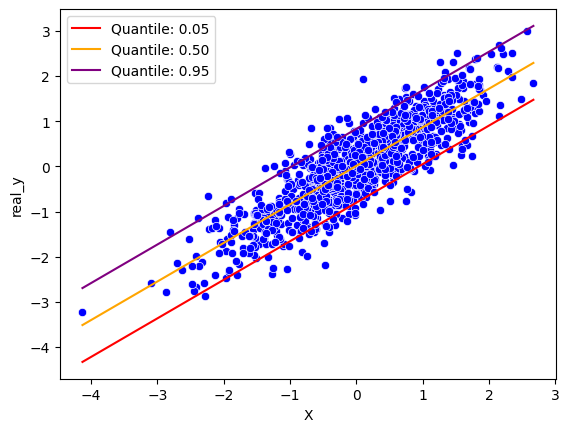

In [12]:
## plot QR results
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame({'X': X.squeeze(), 'real_y': y, 'q05': y_pred[:, 0], 'q50': y_pred[:, 1], 'q95': y_pred[:, 2]})

## scatter plot of the data
sns.scatterplot(df, x = 'X', y = 'real_y', color = 'blue')

## plot the quantile regression lines
sns.lineplot(df, x = 'X', y = 'q05', color = 'red', label = 'Quantile: 0.05')
sns.lineplot(df, x = 'X', y = 'q50', color = 'orange', label = 'Quantile: 0.50')
sns.lineplot(df, x = 'X', y = 'q95', color = 'purple', label = 'Quantile: 0.95')
plt.show()